## Пример. Случайное блуждание
Случайное блуждание — математический объект, известный как стохастический или случайный процесс, который описывает путь, состоящий из последовательности случайных шагов в каком-нибудь математическом пространстве (например, на множестве целых чисел).

Простейшим примером случайного блуждания является случайное блуждание по числовой прямой целых чисел, которое начинается в точке 0 и на каждом шаге сдвигается на +1 или на −1 с равной вероятностью.

Реализация одного случайного блуждания с 1000 шагов на чистом Python:

In [1]:
import random

def pure_py_random_walk():
    position = 0
    walk = [position]
    nsteps = 1000

    for _ in range(nsteps):
        step = 1 if random.randint(0, 1) else -1
        position += step
        walk.append(position)
    return position, walk

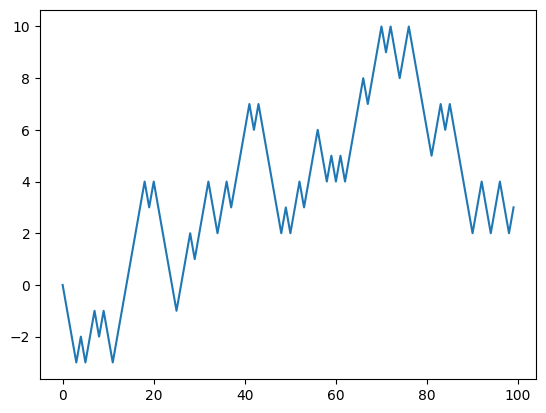

In [2]:
import matplotlib.pyplot as plt

_, walk = pure_py_random_walk()

plt.plot(walk[:100])

Теперь реализация с помощью `numpy.random`:

In [7]:
import numpy as np

rng = np.random.default_rng(10000)

def numpy_random_walk():
    nsteps = 1000
    draws = rng.integers(0, 2, size=nsteps)
    steps = np.where(draws == 0, 1, -1)
    walk = steps.cumsum()
    
    return walk

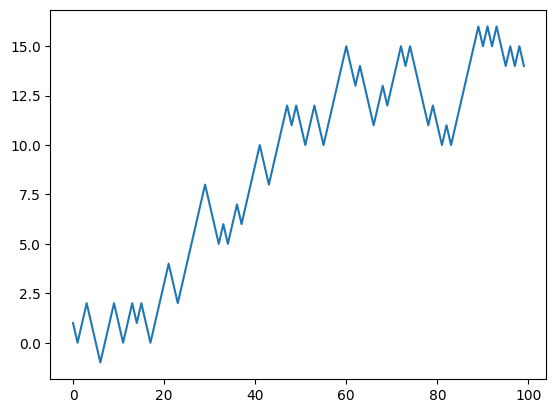

In [8]:
walk = numpy_random_walk()

plt.plot(walk[:100])

Теперь можно приступить к вычислению статистики, например минимального и максимального значений на траектории блуждания:

In [9]:
print(walk.min())
print(walk.max())

-14
40


Более сложная статистика - момент первого пересечения - это шаг, на котором траектория блуждания впервые достигает заданного значения. В данном случае мы хотим знать, сколько времени потребуется на удаление от нуля на 10 единиц.  Выражение `np.abs(walk) >= 10` дает булев массив, показывающий, в какие моменты блуждание достигало или превышало 10. Однако если нас интересует только индекс первого значения 10 или -10. Его можно вычислить с помощью метода `argmax`, которая возвращает индекс первого максимального значения в булевом массиве (True - максимальное значение):

In [11]:
print((np.abs(walk) >= 10).argmax())

41


*Использование `argmax` не всегда оптимально, потому что она всегда просматривает весь массив. В данном случае мы знаем, что первое же встретившееся значение `True` является максимальным.*

### Моделирование сразу нескольких случайных блужданий
Если бы потребовалось смоделировать много случайных блужданий, то это можно сделать путем небольшой модификации кода. Если функциям из модуля `numpy.random` передать 2-кортеж, то они сгенерируют двумерный массив случайных чисел, и можно вычислить нарастающие суммы по строкам за одну операцию.

In [27]:
def numpy_several_random_walks(nwalks):
    nsteps = 1000
    draws = rng.integers(0, 2, size=(nwalks, nsteps))
    steps = np.where(draws > 0, 1, -1)

    walks = steps.cumsum(axis=1)
    
    return walks

walks = numpy_several_random_walks(10)

print(np.argmax(np.abs(walks) >= 10, axis=1))

[ 29  23 147  45  43  59  99  19  55  85]


In [28]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
print(hits30)
print(hits30.sum())

[ True False False  True False  True  True  True  True False]
6
